Medical Insurance Cost Prediction Model 


importing necessary libraries


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
# loading the data
ins_dataset = pd.read_csv('/content/insurance.csv')

In [21]:
# checking the data
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
ins_dataset.shape

(1338, 7)

In [23]:
# Describing the data
ins_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Visualisation

In [24]:
# checking for missing values
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


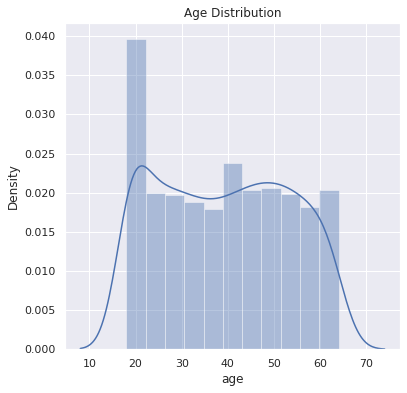

In [25]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ins_dataset['age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


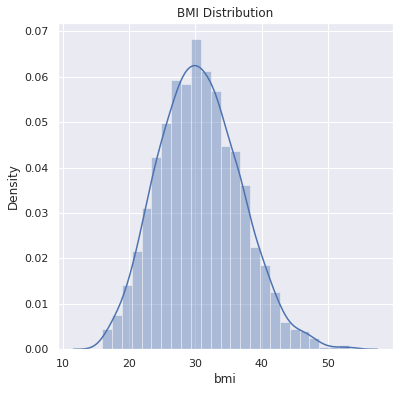

In [26]:
# distribution of bmi values

plt.figure(figsize=(6,6))
sns.distplot(ins_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

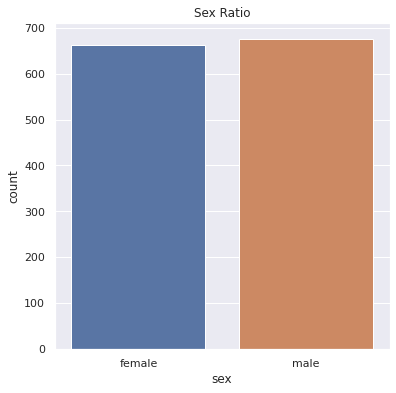

In [27]:
# Visualisation of sex clomn values

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=ins_dataset)
plt.title("Sex Ratio")
plt.show()

In [28]:
ins_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

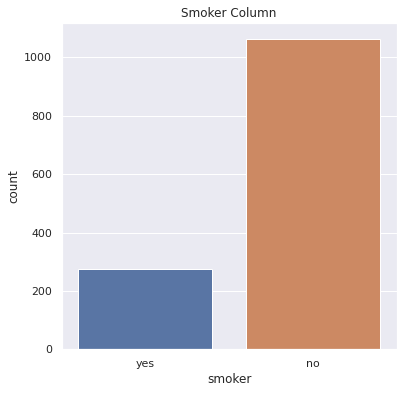

In [29]:
# Visualisation of smoker clomn values

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=ins_dataset)
plt.title("Smoker Column")
plt.show()

In [30]:
ins_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

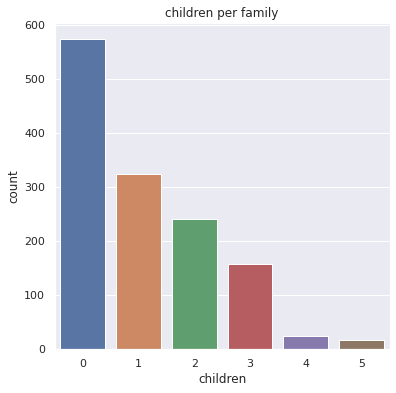

In [31]:
# children column distribution

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=ins_dataset)
plt.title('children per family')
plt.show()

In [32]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


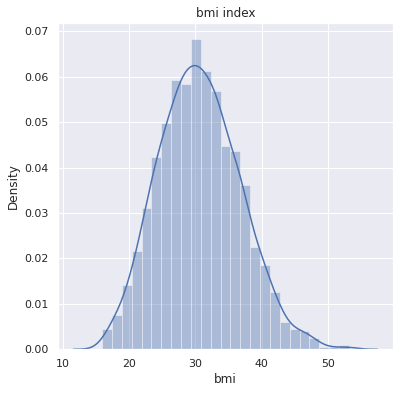

In [33]:
#distribution of bmi column

plt.figure(figsize=(6,6))
sns.distplot(ins_dataset['bmi'])
plt.title('bmi index')
plt.show()

In [34]:
# children column distribution

# plt.figure(figsize=(6,6))
# ins_dataset = sns.load_dataset("/content/insurance.csv")
# sns.jointplot(data=ins_dataset, kind='bar', x='children')
# plt.title('children per family')
# plt.show()

Data Pre-processing

In [35]:
#ins_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [36]:
# encodeing columns sex smoker region

ins_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
ins_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
ins_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [37]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and target

In [38]:
X = ins_dataset.drop(columns='charges', axis=1)
Y = ins_dataset['charges']

In [39]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [40]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data for training and testing

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape)

(1338, 6) (1070, 6)


Model Training

Linear Regression

In [43]:
regressor = LinearRegression()

In [44]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [45]:
train_data_prediction = regressor.predict(X_train)

In [46]:
# R sq value 
# testing in trained data
r2_train = metrics.r2_score(train_data_prediction, Y_train)
print(r2_train)

0.6693380032904603


In [47]:
r2_train1 = metrics.r2_score(Y_train, train_data_prediction)
print(r2_train1)

0.751505643411174


In [48]:
# testing in fresh data using r2 sq value
test_data_prediction = regressor.predict(X_test)

In [50]:
r2_test = metrics.r2_score(test_data_prediction, Y_test)
print(r2_test)

0.6606659986058923


Building a predictive System

In [56]:
#taking random input 
input = (31,1,25.74,0,1,0)

# converting it in np array
input_nparray = np.asarray(input)

# reshape the array
input_nparray_reshaped = input_nparray.reshape(1, -1)

prediction = regressor.predict(input_nparray_reshaped)
print(prediction)

print("\nPredicted value of Med. Insurance in USD", prediction[0], "\n")

[3760.0805765]

Predicted value of Med. Insurance in USD 3760.0805764960587 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
